In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from IPython.display import Image
import graphviz
import pydotplus
import seaborn as sns
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
dataset= pd.read_excel('/content/default of credit card clients.xls', header=1)
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
# dataset.columns = dataset.iloc[0]
# dataset.drop(index = 0, inplace = True)
# dataset.reset_index(inplace = True)
# dataset

In [7]:
dataset.drop(['ID'], axis=1,inplace = True)
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
dataset.shape

(30000, 24)

In [9]:
dataset.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [12]:
# columns = list(dataset.columns)
# for i in range(len(columns)):
#   dataset[columns[i]] = dataset[columns[i]].astype('int')

In [13]:
# dataset.info()

In [14]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
columns = list(dataset.columns)
print('No of unique values in: ')
for i in range(len(columns)):
  x=dataset[columns[i]].unique()
  print('{}){}:{}'.format(i+1,columns[i],x))

No of unique values in: 
1)LIMIT_BAL:[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
2)SEX:[2 1]
3)EDUCATION:[2 1 3 5 4 6 0]
4)MARRIAGE:[1 2 3 0]
5)AGE:[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
6)PAY_0:[ 2 -1  0 -2  1  3  4  8  7  5  6]
7)PAY_2:[ 2  0 -1 -2  3

Sex, Education, Marriage, Pay_0 to Pay_6 are categorical input features.

##b) Fitting a random forest model with default hyperparameters. Showing its accuracy and classification report.

In [16]:
X=dataset.drop(['default payment next month'], axis=1)
Y=dataset['default payment next month']
print(X.shape)
print(Y.shape)

(30000, 23)
(30000,)


In [17]:
#splitting the dataset training dataset and test dataset
#0.2 i.e. 20% of the data is test data. and 0.8 i.e. 80% of the data = training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [18]:
# creating a RF classifier
model_rf = RandomForestClassifier() 
model_rf.fit(X_train, Y_train)
Y_pred = model_rf.predict(X_test)

In [19]:
from sklearn import metrics  
print("Accuarcy of Model: {:.2f}%".format(metrics.accuracy_score(Y_test, Y_pred)*100))

Accuarcy of Model: 81.71%


In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7060
           1       0.63      0.36      0.46      1940

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



##c) : Using GridSearchCV tune for max depth. Plot training and testing accuracies vs max depth in a single plot


In [21]:
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10,11]
}

rf =RandomForestClassifier()
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             verbose=2)

In [22]:
# Check best model by the grid search and display it
print("The best parameter for Max_depth is: ", grid.best_params_)

The best parameter for Max_depth is:  {'max_depth': 7}


In [23]:
lst_max_depth = [2,3,4,5,6,7,8,9,10,11]             #list of values for max_depth parameter.
test_score_max_depth= []
train_score_max_depth = []

for i in range(len(lst_max_depth)):
  model = RandomForestClassifier(random_state=0, max_depth=lst_max_depth[i])  
  model.fit(X_train, Y_train)
  train_score_max_depth.append(model.score(X_train,Y_train)*100)
  test_score_max_depth.append(model.score(X_test, Y_test)*100)

print('Test accuracies: {}'.format(test_score_max_depth))
print('Train accuracies: {}'.format(train_score_max_depth))

Test accuracies: [80.60000000000001, 81.3, 81.55555555555556, 81.56666666666666, 82.35555555555555, 82.58888888888889, 82.56666666666666, 82.6, 82.45555555555556, 82.23333333333333]
Train accuracies: [80.08571428571429, 80.92857142857143, 81.23809523809524, 81.4952380952381, 82.57142857142857, 83.02380952380952, 83.78095238095239, 84.76666666666667, 85.79523809523809, 86.86666666666667]


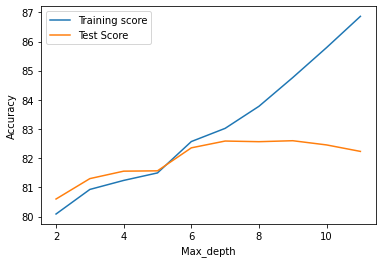

In [24]:
plt.plot(lst_max_depth, train_score_max_depth, label = "Training score")
plt.plot(lst_max_depth, test_score_max_depth, label = "Test Score")
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###From the above grid search, we get to know that our best value of max_depth = 7 and at later point when we plot a graph between max_depth and (training and testing accuracy) we are getting the maximum testing accuracy at max_depth=7. So the graph satisfies our paramater which we have obtained from grid search.

##d) Tuning n estimators:

In [ ]:
param_grid = {
    'n_estimators': [70,80,90,100,110,120,130]
}

rf_estimators =RandomForestClassifier()
grid_estimators = GridSearchCV(estimator = rf_estimators, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_estimators.fit(X_train,Y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [70, 80, 90, 100, 110, 120, 130]},
             verbose=2)

In [ ]:
# Check best model by the grid search and display it
print("The best parameter for n_estimators is: ", grid_estimators.best_params_)

The best parameter for n_estimators is:  {'n_estimators': 120}


In [ ]:
lst_n_estimators = [70,80,90,100,110,120,130]             #list of values for n_estimators parameter.
test_score_n_estimators= []
train_score_n_estimators = []

for i in range(len(lst_n_estimators)):
  model1 = RandomForestClassifier(random_state=0, n_estimators=lst_n_estimators[i])  
  model1.fit(X_train, Y_train)
  train_score_n_estimators.append(model.score(X_train,Y_train)*100)
  test_score_n_estimators.append(model.score(X_test, Y_test)*100)

print('Test accuracies: {}'.format(test_score_n_estimators))
print('Train accuracies: {}'.format(train_score_n_estimators))

Test accuracies: [82.23333333333333, 82.23333333333333, 82.23333333333333, 82.23333333333333, 82.23333333333333, 82.23333333333333, 82.23333333333333]
Train accuracies: [86.86666666666667, 86.86666666666667, 86.86666666666667, 86.86666666666667, 86.86666666666667, 86.86666666666667, 86.86666666666667]


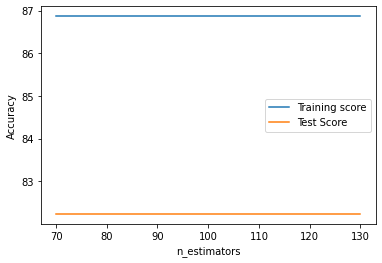

In [ ]:
plt.plot(lst_n_estimators, train_score_n_estimators, label = "Training score")
plt.plot(lst_n_estimators, test_score_n_estimators, label = "Test Score")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###From the above grid search, we get to know that our best value of n_estimators = 120 and at later point when we plot a graph between n_estimators and (training and testing accuracy) we are getting the maximum testing accuracy at n_estimators = 120. So the graph satisfies our paramater which we have obtained from grid search.

###e) : Using GridSearchCV tune the following hyper-parameters: ’max depth’,’min samples leaf’, ’min samples split’, ’n estimators’, ’max features’

In [25]:
param_grid = { 
    'n_estimators': [110,120],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7],
    'min_samples_leaf': [1,2,3], 
    'min_samples_split': [2,3]
}

In [26]:
rfc =RandomForestClassifier()
grid = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [110, 120]},
             verbose=2)

In [27]:
# Check best model by the grid search and display it
print("The best parameter for more tuned model are: ")
print(grid.best_params_)

The best parameter for more tuned model are: 
{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 120}


In [28]:
new_model = RandomForestClassifier(max_depth= 7, max_features= "log2", min_samples_leaf= 2, min_samples_split= 3, n_estimators= 120) 
new_model.fit(X_train, Y_train)
Y_pred_new = new_model.predict(X_test)


In [29]:
print("Accuarcy of Model(before hyperparameter tuning): {:.2f}%".format(metrics.accuracy_score(Y_test, Y_pred)*100))
print("Accuarcy of Model(after hyperparameter tuning): {:.2f}%".format(metrics.accuracy_score(Y_test, Y_pred_new)*100))
print()

Accuarcy of Model(before hyperparameter tuning): 81.71%
Accuarcy of Model(after hyperparameter tuning): 82.38%



In [30]:
print('CLASSIFICATION REPORT (of hyperparameters tuned model)=>')
print(classification_report(Y_test,Y_pred_new, labels=[0,1]))

CLASSIFICATION REPORT (of hyperparameters tuned model)=>
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7060
           1       0.68      0.35      0.46      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000

